In [32]:
import tvDatafeed as tv
import numpy as np
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
%config InlineBackend.figure_format='retina'

#obj = ut.HistStockPrice()
obj = tv.TvDatafeed()

In [64]:
df = obj.get_hist(symbol='ERW',exchange='SET',interval=tv.Interval.in_daily,n_bars=500)

In [65]:
df.index = df.index.date # เอาส่วนของเวลาออก

In [66]:
df['mu'] = df['volume'].rolling(252).mean()
df['std'] = df['volume'].rolling(252).std()
df['z-score'] = (df['volume']-df['mu'])/df['std']

In [67]:
df = df.dropna()

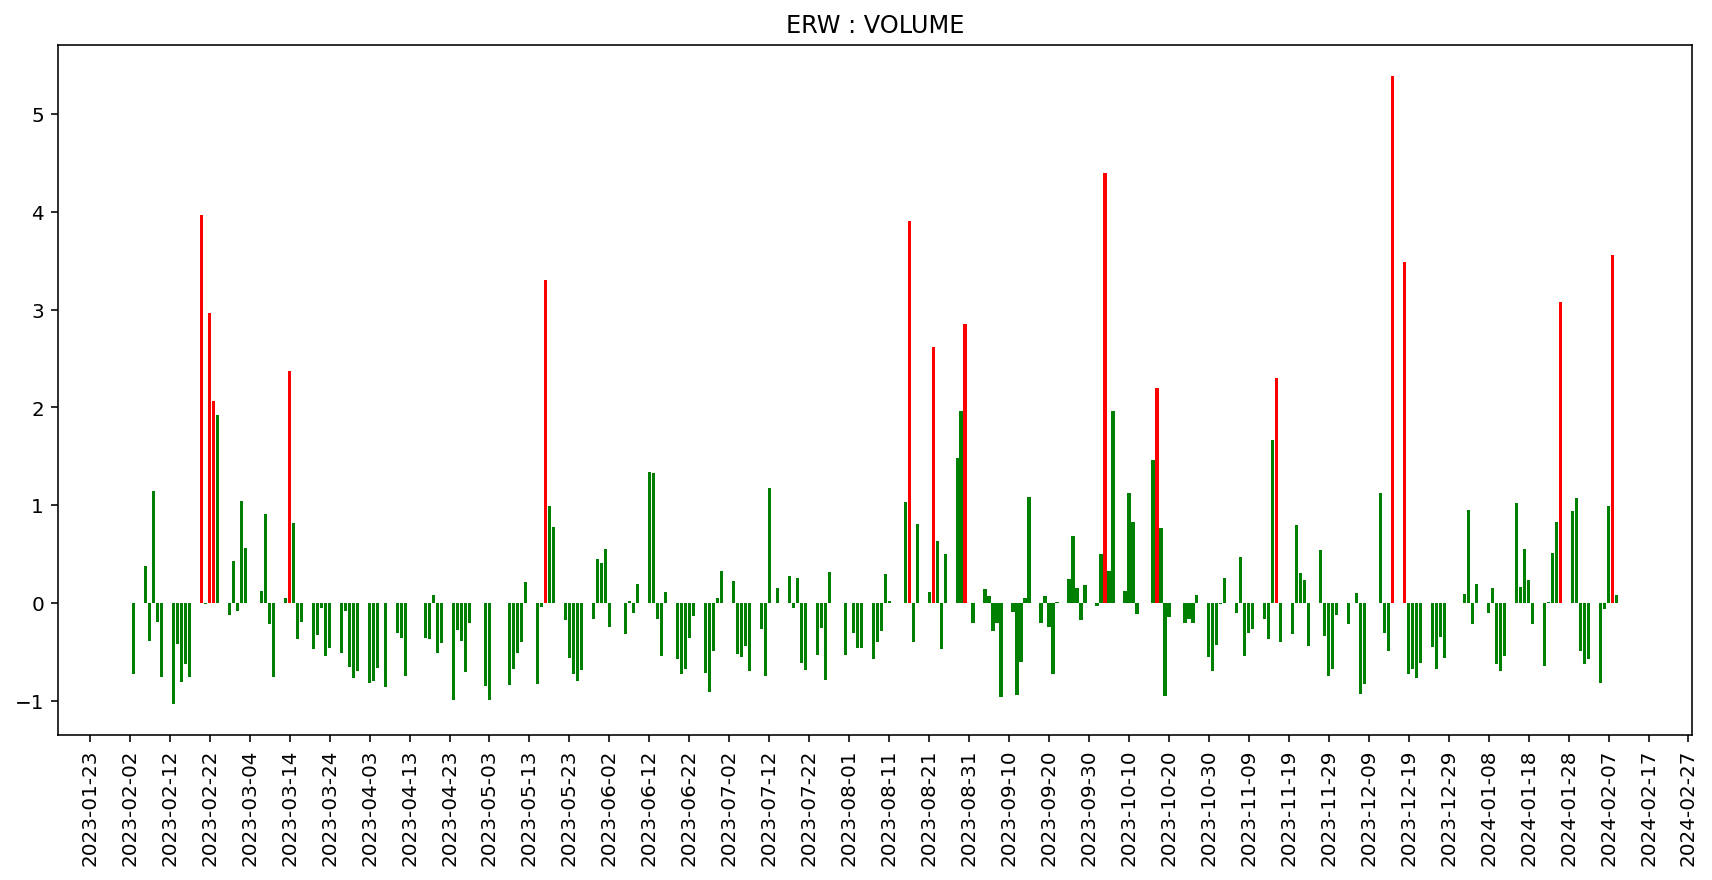

In [84]:
# พล็อตกราฟแบบบาร์
fig, ax = plt.subplots(facecolor='w',figsize=(12,6))
#df['z-score'].plot(kind='bar',ax=ax,figsize=(12,6))

color = np.where((df['z-score']>2) | (df['z-score']<-2),'red','green' )
plt.bar(df.index,df['z-score'],color=color)

# ปรับการแสดงผลของแกน x เพื่อลดความถี่ของช่วงเวลาที่แสดง
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))  # เลือกทุก 5 วันเพื่อแสดงบนแกน X
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: df.index.date[int(x)] if int(x) < len(df.index.date) else ''))

plt.xticks(rotation=90)  # หมุนข้อความแกน x เพื่อความชัดเจน
plt.tight_layout()  # ปรับ layout ให้พอดี
#plt.yscale('log')
plt.title('ERW : VOLUME')
plt.show()

In [85]:
df['mu'].mean()

14922450.718349583